(from last class) Real world example

https://github.com/pytorch/examples/blob/main/imagenet/main.py


In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
ROOT="/content/drive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/drive


In [2]:
%pwd

'/content'

In [7]:
%cd /content/drive/MyDrive/dlss24

/content/drive/MyDrive/dlss24


In [4]:
%pwd

'/content/drive/MyDrive/dlss24'

# Data

Download the corpora data from: https://codeocean.com/capsule/0078777/tree/v1

Uploaded to a location outside your gitHub (to do not be tracked)

You pwd should have the files:


1.   source_corpus.csv
2.   target_corpus.csv




# Module IV:  - Class 6 - Text Classifiers

This notebook have the network framework pytorch and how CNNs work

# Basic Pre processing and tokenization

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
#load the pickle file in OLAT
#df_dummies_model.to_pickle('df_dummies_model.pkl')

df_source_corpus=pd.read_csv('/content/drive/MyDrive/dlss24/source_corpus.csv')

In [10]:
df_source_corpus.head()

,topic_44,topic_8,text
0,democracy,freedom and democracy,"Two hundred summers ago, this Democratic Party..."
1,freedom and human rights,freedom and democracy,"In 1992, the party Thomas Jefferson founded in..."
2,law and order,fabric of society,Our land reverberates with a battle cry of fru...
3,no topic,no topic,America is on the wrong track.
4,civic mindedness,fabric of society,The American people are hurting.




```
# Ce texte est au format code
```



> Create a plot with the number of sentences (or rows) per topic



<ipython-input-13-6774fa85437c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentence_counts, y=topics, palette='viridis')


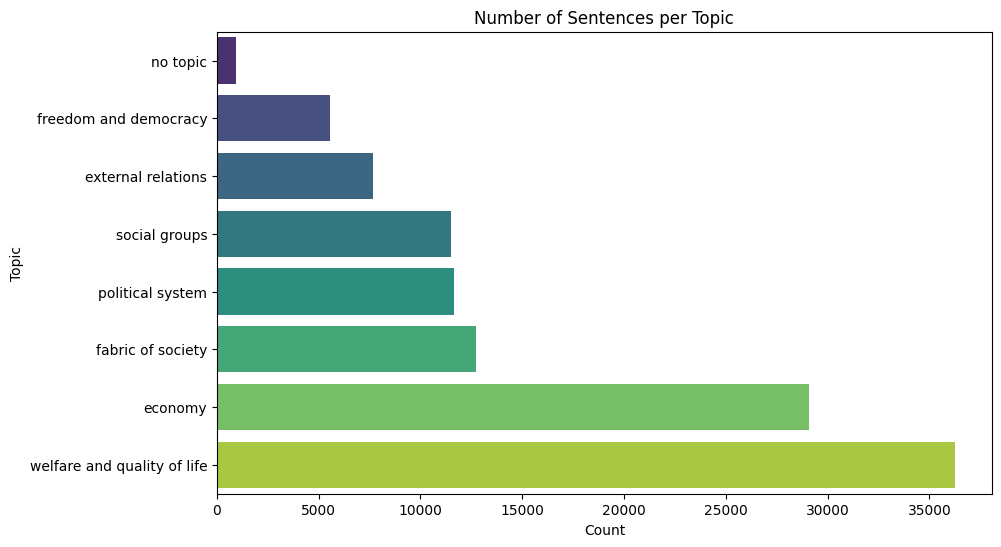

In [13]:
#### YOUR CODE STARTS HERE ####
from matplotlib import pyplot as plt
import seaborn as sns

# Group by topic and count the number of sentences
sentence_counts_per_topic = df_source_corpus.groupby('topic_8').size().reset_index(name='Sentence_Count')

# Sort the DataFrame by sentence count in descending order
sentence_counts_per_topic = sentence_counts_per_topic.sort_values(by='Sentence_Count', ascending=True)

# Extract topics and sentence counts from the grouped DataFrame
topics = sentence_counts_per_topic['topic_8']
sentence_counts = sentence_counts_per_topic['Sentence_Count']

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sentence_counts, y=topics, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Topic')
plt.title('Number of Sentences per Topic')

# Show the plot
plt.show()

##### YOUR CODE ENDS HERE ####

## Sentence Tokenization

In [63]:
text = "K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor. The 2 are nobel prize winners."

**NLTK**: fast with some errors

In [64]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [65]:
# by puntuation
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

["K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor.", 'The 2 are nobel prize winners.']


**Spacy**: better than NLTK

In [66]:
import spacy
# by language
nlp = spacy.load('en_core_web_sm')


In [67]:
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[K. Alex Müller on the right track: Soon afterwards, he and M.A's J. Georg Bednorz discovered the first high-temperature superconductor., The 2 are nobel prize winners.]


In [68]:
doc.is_sentenced

<ipython-input-68-3aef1413076c>:1: DeprecationWarning: [W107] The property `Doc.is_sentenced` is deprecated. Use `Doc.has_annotation("SENT_START")` instead.
  doc.is_sentenced


True

In [69]:
doc.sentiment

0.0

# Pre Processing



0.   Choose the unit (sentence, document, paragraph, speech)

1.   Capitalization
2.   Puntuation
3.   Tokens
4.   Numbers
5.   Stopwords
6.   Stemming
7.   Lemmatizing



### 1. Capitalization

In [70]:
# Capitalization
text_lower = text.lower() # go to lower-case

In [71]:
text_lower

"k. alex müller on the right track: soon afterwards, he and m.a's j. georg bednorz discovered the first high-temperature superconductor. the 2 are nobel prize winners."

### 2. Punctuation

In [72]:
# recipe for fast punctuation removal
from string import punctuation
print ("punctuation:", punctuation)

punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


always check what kind of punctuation you want to remove

In [73]:
#maktrans function from str, args are: find-character, replace-character, remove-character
punc_remover = str.maketrans('','',punctuation) #replacement and removing
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

k alex müller on the right track soon afterwards he and mas j georg bednorz discovered the first hightemperature superconductor the 2 are nobel prize winners


### 3. Tokenization of words

In [74]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', '2', 'are', 'nobel', 'prize', 'winners']


### 4. Numbers



```
# Ce texte est au format code
```



> Replace the number found by the # character



In [80]:
# Replace digits with #
norm_numbers = [t if not t.isdigit() else '#' for t in tokens]

print(tokens)
print(norm_numbers)

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', '2', 'are', 'nobel', 'prize', 'winners']
['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'the', 'first', 'hightemperature', 'superconductor', 'the', '#', 'are', 'nobel', 'prize', 'winners']


### 5. Stopwords

From NLTK

In [81]:
# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
stoplist = stopwords.words('english')
print ("stop words:", stoplist)

stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [83]:
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

['k', 'alex', 'müller', 'right', 'track', 'soon', 'afterwards', 'mas', 'j', 'georg', 'bednorz', 'discovered', 'first', 'hightemperature', 'superconductor', '#', 'nobel', 'prize', 'winners']


From scikit-learn

In [84]:
# scikit-learn stopwords
# depending on sklearn version, for sklearn==0.24.1, stop_words are here
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS as stop_words
sorted(list(stop_words))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [85]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

### 6. Stemming

Heuristic based, reduce variations of words like -ed, -s

In [86]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english

the way it changes the words is agressive, maybe do not use it

In [87]:
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in tokens]
print(tokens_stemmed)

['k', 'alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterward', 'he', 'and', 'mas', 'j', 'georg', 'bednorz', 'discov', 'the', 'first', 'hightemperatur', 'superconductor', 'the', '2', 'are', 'nobel', 'prize', 'winner']


### 7. Lemmatizing

Linguistic-based, reduces words with linguistic meaning. Superlatives and Verbs infinitive/base form.

In [88]:
# Lemmatizing
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [89]:
wnl = WordNetLemmatizer()
wnl.lemmatize('corporation'), wnl.lemmatize('corporations')

('corporation', 'corporation')

In [90]:
stemmer.stem('corporations')

'corpor'

In [91]:
wnl.lemmatize('was')

'wa'

In [92]:
wnl.lemmatize('went') #go

'went'

In [93]:
wnl.lemmatize('better') #good

'better'

All in one function:

In [94]:
from string import punctuation
translator = str.maketrans('','',punctuation)
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed



```
# Ce texte est au format code
```



> Apply the normalized_text function to the text column of df_source_corpus




In [98]:
missing_values = df_source_corpus['text'].isnull()

missing_values.value_counts()

text
False    115408
True          2
Name: count, dtype: int64

In [100]:
string_rows = df_source_corpus[~df_source_corpus['text'].apply(lambda x: isinstance(x, str))]
string_rows

,topic_44,topic_8,text
30723,freedom and human rights,freedom and democracy,NaN
111003,welfare state expansion,welfare and quality of life,NaN


apply requires function that runs through each item

In [101]:
#### YOUR CODE STARTS HERE ####

df_source_corpus = df_source_corpus.dropna(subset=['text'])
df_source_corpus['tokens_cleaned'] = df_source_corpus['text'].apply(normalize_text)


##### YOUR CODE ENDS HERE ####

In [102]:
df_source_corpus.head()

,topic_44,topic_8,text,tokens_cleaned
0,democracy,freedom and democracy,"Two hundred summers ago, this Democratic Party...","[two, hundr, summer, ago, democrat, parti, fou..."
1,freedom and human rights,freedom and democracy,"In 1992, the party Thomas Jefferson founded in...","[#, parti, thoma, jefferson, found, invok, spi..."
2,law and order,fabric of society,Our land reverberates with a battle cry of fru...,"[land, reverber, battl, cri, frustrat, eman, a..."
3,no topic,no topic,America is on the wrong track.,"[america, wrong, track]"
4,civic mindedness,fabric of society,The American people are hurting.,"[american, peopl, hurt]"


# **Gensim**: All in one

In [103]:
from gensim.utils import simple_preprocess # lowercase, tokenized, punctuations/numbers removed
print(simple_preprocess(text))

['alex', 'müller', 'on', 'the', 'right', 'track', 'soon', 'afterwards', 'he', 'and', 'georg', 'bednorz', 'discovered', 'the', 'first', 'high', 'temperature', 'superconductor', 'the', 'are', 'nobel', 'prize', 'winners']


In [104]:
# I have cleaned 'text' colun before
df_source_corpus['tokens_cleaned'] = df_source_corpus['text'].apply(simple_preprocess)
df_source_corpus['tokens_cleaned']

0         [two, hundred, summers, ago, this, democratic,...
1         [in, the, party, thomas, jefferson, founded, i...
2         [our, land, reverberates, with, battle, cry, o...
3                      [america, is, on, the, wrong, track]
4                     [the, american, people, are, hurting]
                                ...                        
115405    [they, ll, do, this, by, running, deficits, th...
115406    [driving, up, the, price, of, everything, cana...
115407    [threatening, canada, economic, prospects, by,...
115408    [bringing, back, the, costly, wasteful, and, i...
115409    [repealing, our, important, reforms, that, hav...
Name: tokens_cleaned, Length: 115408, dtype: object

(OPTIONAL) If you want to customize the gensim:

In [105]:
complicated_text = "<div>Prof. Zurich <i>hailed</i> from Zurich., She got 3 M.A.'s from ETH.</div>" # added html tags

from gensim.parsing.preprocessing import preprocess_string, \
strip_tags, strip_punctuation, strip_multiple_whitespaces, strip_numeric, remove_stopwords, strip_short, stem_text

preprocess_string(complicated_text) # with all default filters: lowercase, tags, puncations, whitespaces, numerics, short words, stop words.

# remove some filters to keep more tokens.
# e.g. If I want to keep stopwords, short words, and numbers and keep the words not stemmed
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, strip_multiple_whitespaces]
preprocess_string(complicated_text, CUSTOM_FILTERS) # only use the customized filters

['prof',
 'zurich',
 'hailed',
 'from',
 'zurich',
 'she',
 'got',
 '3',
 'm',
 'a',
 's',
 'from',
 'eth']

# Full analysis with Spacy

In [106]:
dfs = df_source_corpus.sample(1000)
dfs['doc'] = dfs['text'].apply(nlp)

didn't get what function nlp does

In [108]:
dfs['doc'].head()

0    (Repudiating, the, folly, of, an, amateur, for...
1    (-, and, at, the, same, time, eliminate, milli...
2    (The, National, Pension, Reserve, Fund, :, In,...
3    (We, will, also, set, up, KiwiAssure, to, brin...
4    (We, believe, that, now, is, the, right, time,...
Name: doc, dtype: object

In [107]:
dfs=dfs.reset_index()

In [109]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[0]
sent1 # sentence

Repudiating the folly of an amateur foreign policy and defying a worldwide Marxist advance, they announced their strategy in the timeless slogan we repeat today: peace through strength—an enduring peace based on freedom and the will to defend it,

In [110]:
# tokens
list(sent1)

[Repudiating,
 the,
 folly,
 of,
 an,
 amateur,
 foreign,
 policy,
 and,
 defying,
 a,
 worldwide,
 Marxist,
 advance,
 ,,
 they,
 announced,
 their,
 strategy,
 in,
 the,
 timeless,
 slogan,
 we,
 repeat,
 today,
 :,
 peace,
 through,
 strength,
 —,
 an,
 enduring,
 peace,
 based,
 on,
 freedom,
 and,
 the,
 will,
 to,
 defend,
 it,
 ,]

In [111]:
# lemmas
[x.lemma_ for x in sent1]

['repudiate',
 'the',
 'folly',
 'of',
 'an',
 'amateur',
 'foreign',
 'policy',
 'and',
 'defy',
 'a',
 'worldwide',
 'marxist',
 'advance',
 ',',
 'they',
 'announce',
 'their',
 'strategy',
 'in',
 'the',
 'timeless',
 'slogan',
 'we',
 'repeat',
 'today',
 ':',
 'peace',
 'through',
 'strength',
 '—',
 'an',
 'endure',
 'peace',
 'base',
 'on',
 'freedom',
 'and',
 'the',
 'will',
 'to',
 'defend',
 'it',
 ',']

parsing: object, verb, subject etc.

In [112]:
# POS tags
[x.tag_ for x in sent1]

['VBG',
 'DT',
 'NN',
 'IN',
 'DT',
 'JJ',
 'JJ',
 'NN',
 'CC',
 'VBG',
 'DT',
 'JJ',
 'JJ',
 'NN',
 ',',
 'PRP',
 'VBD',
 'PRP$',
 'NN',
 'IN',
 'DT',
 'NN',
 'NN',
 'PRP',
 'VBP',
 'NN',
 ':',
 'NN',
 'IN',
 'NN',
 ':',
 'DT',
 'VBG',
 'NN',
 'VBN',
 'IN',
 'NN',
 'CC',
 'DT',
 'NN',
 'TO',
 'VB',
 'PRP',
 ',']

In [113]:

from collections import Counter
# Initialize a Counter to count tokens
token_counter = Counter()

# Iterate over each Doc object in the 'doc' column and count tokens
for doc in dfs['doc']:
    token_counter.update([token.text for token in doc])

# Print the token counts
print(token_counter)

Counter({'the': 917, '.': 816, 'and': 701, 'to': 679, ',': 678, 'of': 576, 'in': 333, 'a': 331, 'will': 284, 'for': 276, '-': 190, 'that': 182, 'is': 160, 'with': 157, 'We': 150, 'on': 146, 'be': 130, 'by': 115, 'our': 114, ' ': 102, 'are': 97, 'The': 93, 'we': 85, 'have': 82, 'from': 78, '’s': 73, 'their': 72, 'as': 70, 'more': 70, 'an': 64, 'has': 63, 'people': 61, 'it': 60, 'new': 57, 'not': 55, 'or': 54, 'government': 52, 'at': 47, 'they': 46, 'all': 44, 'care': 43, ':': 42, 'ensure': 42, 'this': 41, 'Government': 41, '•': 39, 'public': 39, 'which': 39, 'Australia': 38, 'over': 38, 'system': 38, 'health': 38, 'support': 38, 'can': 37, 'make': 37, ';': 36, 'work': 36, '$': 35, 'million': 34, 'years': 34, 'also': 33, 'who': 32, 'This': 32, 'need': 32, 'local': 32, '–': 32, 'year': 31, 'funding': 31, 'services': 31, 'must': 31, "'s": 30, 'tax': 30, 'policy': 29, ')': 29, 'up': 28, 'its': 28, 'National': 27, 'Labor': 27, 'needs': 27, 'economy': 27, 'other': 27, 'one': 26, 'into': 26, '

In [114]:
token_counter.most_common()[:20]

[('the', 917),
 ('.', 816),
 ('and', 701),
 ('to', 679),
 (',', 678),
 ('of', 576),
 ('in', 333),
 ('a', 331),
 ('will', 284),
 ('for', 276),
 ('-', 190),
 ('that', 182),
 ('is', 160),
 ('with', 157),
 ('We', 150),
 ('on', 146),
 ('be', 130),
 ('by', 115),
 ('our', 114),
 (' ', 102)]



> Print the 20 least common tokens




In [117]:
#### YOUR CODE STARTS HERE ####


token_counter.most_common()[-20:]




##### YOUR CODE ENDS HERE ####

[('arbitration', 1),
 ('voted', 1),
 ('reach', 1),
 ('contract', 1),
 ('stem', 1),
 ('cell', 1),
 ('regard', 1),
 ('Bioethics', 1),
 ('ineffective', 1),
 ('constraint', 1),
 ('electric', 1),
 ('transportation', 1),
 ('Looking', 1),
 ('accompany', 1),
 ('crack', 1),
 ('leads', 1),
 ('Africans', 1),
 ('destroy', 1),
 ('consumers', 1),
 ('ration', 1)]

4309

In [122]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_sents'] = dfs['doc'].apply(lambda x: len(list(x.sents)))

print(dfs['num_words'].sum(axis=0))
print(len(token_counter),'unique words in corpus.')
words_per_sent = len(token_counter) / len(dfs['doc'])
print(words_per_sent,'words per sentence.')

20741
4309 uniquewords in corpus.
4.309 words per sentence.


In [ ]:
dfs

[CountVectorizer Doc](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Vocabulary = features = columns. however countvectorizer does not count every word? Words that appear in at least 1% of the docs. I want max of 1000 features

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(dfs['text'])

# save the vectors
#pd.to_pickle(X,'X.pkl')



print the first entry:

In [125]:
X[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [126]:
X.toarray().shape

(1000, 172)



> Print the shape of the Count Vectorizer and one of its samples



In [ ]:
#### YOUR CODE STARTS HERE ####


X[0].toarray()
X.toarray().shape


##### YOUR CODE ENDS HERE ####

In [129]:
vec.get_feature_names_out()

array(['000', '20', 'access', 'act', 'africa', 'aid', 'allow', 'areas',
       'australia', 'australian', 'authorities', 'authority', 'available',
       'based', 'believe', 'benefit', 'best', 'better', 'budget', 'build',
       'business', 'businesses', 'care', 'cent', 'central', 'change',
       'children', 'commission', 'commitment', 'communities', 'community',
       'conditions', 'continue', 'control', 'cost', 'costs', 'countries',
       'country', 'creating', 'current', 'develop', 'development',
       'economic', 'economy', 'education', 'effective', 'encourage',
       'energy', 'ensure', 'environmental', 'essential', 'establish',
       'existing', 'families', 'family', 'focus', 'free', 'fund',
       'funding', 'funds', 'future', 'government', 'greater', 'growth',
       'health', 'help', 'high', 'homes', 'housing', 'improve',
       'including', 'income', 'increase', 'increased', 'industry',
       'infrastructure', 'international', 'introduce', 'introduced',
       'invest'

we see htat some columns don't tell us much (numbers at the beginning) we would go back and delete those

output the same structure "token: count"

In [130]:
# Select tokens with counts greater than 300
selected_tokens = {token: count for token, count in token_counter.items() if 12< count < 90 }


same number of selected tokens as above. model probably excluded the most said ones (90) and least said ones.

In [131]:
len(selected_tokens)

174

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.


In [132]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01,
                        max_df=0.9,
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2),
                        smooth_idf=True)

X_tfidf = tfidf.fit_transform(dfs['text'])
#pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [133]:
X_tfidf[0].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.51011094, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [134]:
dfs['topic_8'].value_counts()

topic_8
welfare and quality of life    321
economy                        230
political system               114
social groups                  110
fabric of society               99
external relations              79
freedom and democracy           40
no topic                         7
Name: count, dtype: int64

In [135]:
vocab = tfidf.get_feature_names_out()
vocab[:10], vocab[-10:]

(array(['000', '20', 'access', 'act', 'africa', 'aid', 'allow', 'areas',
        'australia', 'australian'], dtype=object),
 array(['water', 'women', 'work', 'workers', 'working', 'world', 'year',
        'years', 'young', 'zealand'], dtype=object))

### Word Cloud

welfare and quality of life


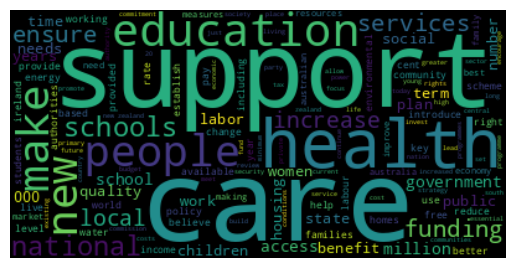

economy


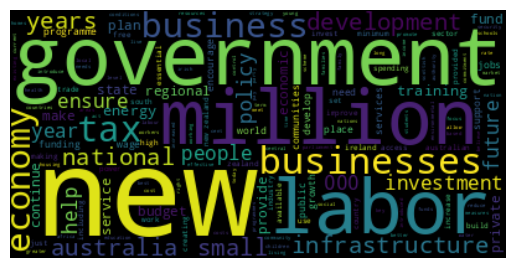

social groups


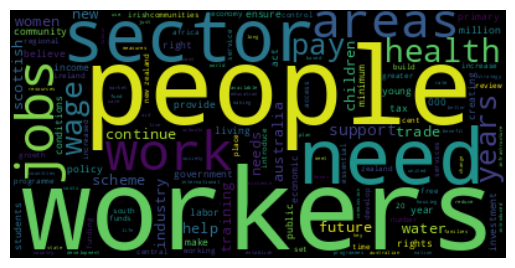

political system


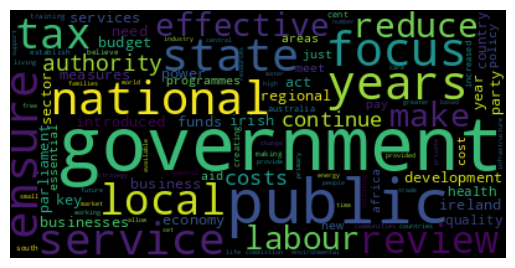

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

for topic_id in ['welfare and quality of life','economy','social groups','political system']:
    slicer = dfs['topic_8'] == topic_id

    #selecting rows
    f = X_tfidf[slicer.values]

    #sum of freq per row
    total_freqs = list(np.array(f.sum(axis=0))[0])

    #put vocab and frew to feed Wordcloud
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict)
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# test

In [141]:
doc.head()

AttributeError: 'spacy.tokens.doc.Doc' object has no attribute 'head'



> Use the replication material to build a Political Science Topic Classifier

[Topic Classification for Political Texts](https://www.cambridge.org/core/journals/political-analysis/article/crossdomain-topic-classification-for-political-texts/F074564984969CE168BCBCF5E7D931C8#article)


*What could they have done different in the pre process step?*

In [142]:
#### YOUR CODE STARTS HERE ####


import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, balanced_accuracy_score
from multiprocessing import cpu_count
cpus = cpu_count() - 1


##Prepare data


#Read manifesto data
data = df_source_corpus
data = data[['topic_8', 'text']]

#Rename several topic
data['topic_8'] = data['topic_8'].astype(str)
data['text'] = data['text'].astype(str)

data = shuffle(data, random_state=87)

X = data['text']
Y = data['topic_8']

tfidf_vectorizer = TfidfVectorizer(stop_words='english', use_idf=True, ngram_range=(1,3), min_df=10, max_df=.4)
tfidf_vectorizer.fit(X)
print(X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75, random_state=77)
#Reset the index
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


##### YOUR CODE ENDS HERE ####

<ipython-input-142-6a1b82e403b5>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_8'] = data['topic_8'].astype(str)
<ipython-input-142-6a1b82e403b5>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].astype(str)


(115408,)


In [ ]:
##Train and assess model using training and test set

#Cross-validated grid-search
lin_clf = LogisticRegression(solver='newton-cg',
                             multi_class='multinomial',
                             n_jobs=cpus)

param_grid = {'C':[1,2,10,100], 'class_weight':[None,'balanced']}
CV_clf = GridSearchCV(estimator=lin_clf, param_grid=param_grid, cv=3)
CV_clf.fit(X_train_tfidf, Y_train)
print(CV_clf.best_params_)

#Train model on training data using best parameters
lin_clf2 = LogisticRegression(C=CV_clf.best_params_['C'], class_weight=CV_clf.best_params_['class_weight'], solver='newton-cg', multi_class='multinomial', n_jobs=cpus)

lin_clf2.fit(X_train_tfidf, Y_train)
Y_pred = lin_clf2.predict(X_test_tfidf)

#Table 2: Compute within-domain metrics
metrics = {'metric': ['Top-1 Accuracy', 'F1 Score (Micro)', 'Balanced Accuracy', 'F1 Score (Macro)'], 'score': [accuracy_score(Y_test, Y_pred), f1_score(Y_test, Y_pred, average='micro'), balanced_accuracy_score(Y_test, Y_pred), f1_score(Y_test, Y_pred, average='macro')]}
metrics = pd.DataFrame(metrics)
metrics['domain'] = 'within-domain'
metrics['topics'] = '44'
print(metrics)


#Table A2: Precision
precision = pd.DataFrame(precision_score(Y_test, Y_pred, average=None))
precision['score'] = 'precision'
print(precision)

#Table A2: Recall
recall = pd.DataFrame(recall_score(Y_test, Y_pred, average=None))
recall['score'] = 'recall'
print(recall)

#Figure A3: confusion matrix
M = pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=list(lin_clf2.classes_))
print(M)




{'C': 2, 'class_weight': None}
              metric     score         domain topics
0     Top-1 Accuracy  0.648551  within-domain     44
1   F1 Score (Micro)  0.648551  within-domain     44
2  Balanced Accuracy  0.510117  within-domain     44
3   F1 Score (Macro)  0.529039  within-domain     44
          0      score
0  0.671211  precision
1  0.734141  precision
2  0.611322  precision
3  0.612750  precision
4  0.307692  precision
5  0.530604  precision
6  0.583496  precision
7  0.671524  precision
          0   score
0  0.750378  recall
1  0.648828  recall
2  0.565634  recall
3  0.454802  recall
4  0.016736  recall
5  0.444935  recall
6  0.417832  recall
7  0.781794  recall
   economy  external relations  fabric of society  freedom and democracy  \
0     5465                  77                115                     41   
1      199                1273                137                     60   
2      264                 112               1771                     82   
3      100   

In [ ]:
##Train model on entire manifesto data using best parameters


X_tfidf = tfidf_vectorizer.transform(X)
lin_clf3 = LogisticRegression(C=CV_clf.best_params_['C'], class_weight=CV_clf.best_params_['class_weight'], solver='newton-cg', multi_class='multinomial', n_jobs=cpus)

lin_clf3.fit(X_tfidf, Y)
#pd.to_pickle(lin_clf3,'/data/logistic_model_44.pkl')



##Calculate Top-1, Top-3 and Top-5 accuracies


#Compute probabilities
Yprob_test = lin_clf2.predict_proba(X_test_tfidf)

#Get labels
Y_test = pd.DataFrame(Y_test)

top5 = np.argsort(Yprob_test, axis=1)[:,-5:]
top5_class = lin_clf2.classes_[top5]

top5_class = pd.DataFrame(top5_class)

results = pd.merge(Y_test, top5_class, left_index=True, right_index=True)

top5_conditions = [
        (results.iloc[:,0]==results[0]),
        (results.iloc[:,0]==results[1]),
        (results.iloc[:,0]==results[2]),
        (results.iloc[:,0]==results[3]),
        (results.iloc[:,0]==results[4])]
top5_choices = [1, 1, 1, 1, 1]

top3_conditions = [
        (results.iloc[:,0]==results[2]),
        (results.iloc[:,0]==results[3]),
        (results.iloc[:,0]==results[4])]
top3_choices = [1, 1, 1]

top1_conditions = [(results.iloc[:,0]==results[4])]
top1_choices = [1]

#Create the success columns
results['top_5'] = np.select(top5_conditions, top5_choices, default=0)
results['top_3'] = np.select(top3_conditions, top3_choices, default=0)
results['top_1'] = np.select(top1_conditions, top1_choices, default=0)

#Table 2: Total accuracy
metrics2 = {'metric': ['Top-1 accuracy', 'Top-3 accuracy', 'Top-5 accuracy'], 'score': [round(sum(results['top_1'])/results.shape[0], 3), round(sum(results['top_3'])/results.shape[0], 3), round(sum(results['top_5'])/results.shape[0], 3)]}
metrics2 = pd.DataFrame(metrics2)
metrics2['domain'] = 'within-domain'
metrics2['topics'] = '44'
print(matrics2)


In [ ]:
#This was in 2019 (print the metrics)
metrics

In [ ]:
#This was in 2023
# https://manifesto-project.wzb.eu/information/documents/manifestoberta
